In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


import os
address = os.getcwd()
print(os.listdir(address))

['.ipynb_checkpoints', 'Supermart Grocery Sales - Retail Analytics Dataset.ipynb', 'Supermart_Grocery_Sales.csv']


In [2]:
sales = pd.read_csv('C:\\Users\\WELCOME\\UM\\Supermart_Grocery_Sales.csv')
sales.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [4]:
# Convert 'Order Date' to datetime format
sales['date'] = pd.to_datetime(sales['Order Date'], errors='coerce')

In [5]:
sales['date'].dtype

dtype('<M8[ns]')

In [6]:
type(sales['date'])

pandas.core.series.Series

In [7]:
sales['date'] = pd.to_datetime(sales['date'])
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [8]:
# Profit % on sales
sales["Discounted Sales"] = sales["Sales"] * (1 - sales["Discount"])  # Adjusted sales after discount
sales["Profit Margin"] = sales["Profit"] / sales["Sales"]

In [9]:
# Aggregate Sales and Profit by Category
category_summary = sales.groupby("Category")[["Sales", "Profit"]].sum().reset_index()

In [10]:

# Aggregate Sales by Region
region_sales = sales.groupby("Region")["Sales"].sum()

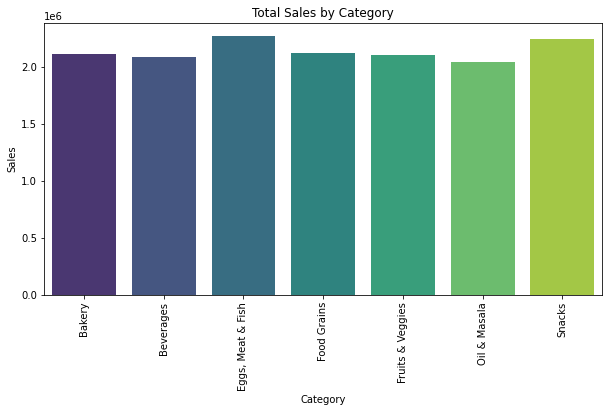

In [11]:
# Visualization: Sales by Category
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Sales", data=category_summary, palette="viridis")
plt.xticks(rotation=90)
plt.title("Total Sales by Category")
plt.show()

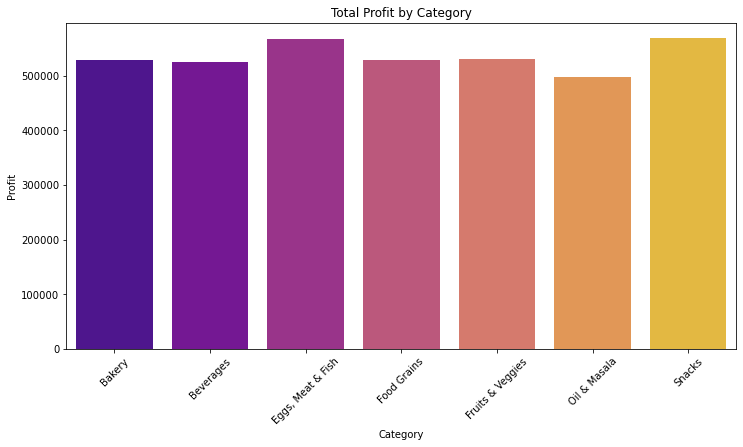

In [12]:
# Visualization: Total Profit by Category
plt.figure(figsize=(12, 6))
sns.barplot(x="Category", y="Profit", data=category_summary, palette="plasma")
plt.title("Total Profit by Category")
plt.xticks(rotation=45)
plt.show()

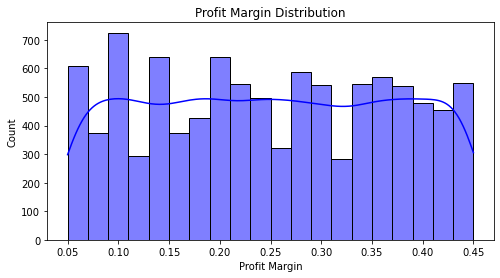

In [13]:
# Visualization: Profit Margin Distribution
plt.figure(figsize=(8, 4))
sns.histplot(sales["Profit Margin"], bins=20, kde=True, color="blue")
plt.title("Profit Margin Distribution")

plt.show()

Text(0.5, 1.0, 'Sub Category Distribution Across Regions')

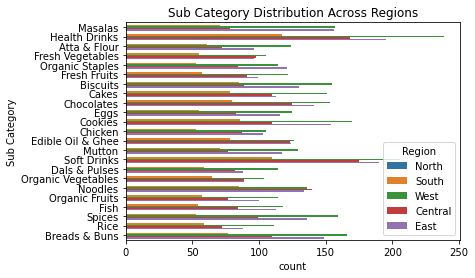

In [14]:
# Visualization: Sub Category Distribution Across Regions
sns.countplot(y='Sub Category', hue='Region', data=sales)
plt.title("Sub Category Distribution Across Regions")

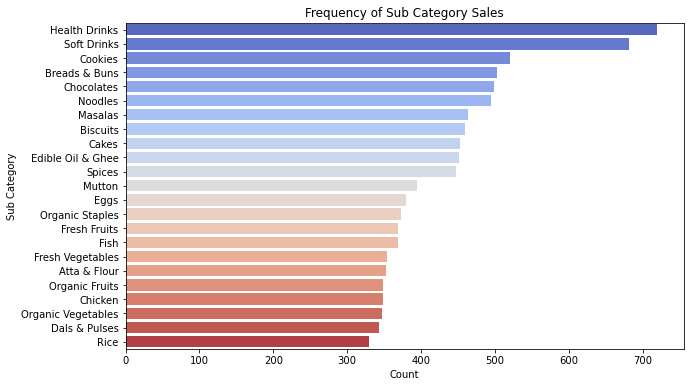

In [15]:
#Visualization: Frequency of Sub Category Sales
plt.figure(figsize=(10, 6))
sns.countplot(y="Sub Category", data=sales, order=sales["Sub Category"].value_counts().index, palette="coolwarm")
plt.title("Frequency of Sub Category Sales")
plt.xlabel("Count")
plt.ylabel("Sub Category")
plt.show()

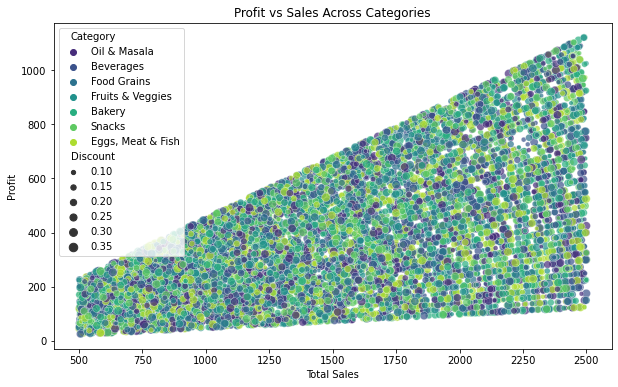

In [16]:
#Visualization: Profit vs Sales Across Categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sales", y="Profit", data=sales, hue="Category", size="Discount", alpha=0.7, palette="viridis")
plt.title("Profit vs Sales Across Categories")
plt.xlabel("Total Sales")
plt.ylabel("Profit")
plt.show()